<a href="https://colab.research.google.com/github/orenfix10/ML-project1/blob/second/hw1_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ex1 - Unsupervised learning**

## Names and IDs

1.   315726828
2.   209122282


In this assignemnt you will practice unsupervised methods we saw in class, and specifically running K-means and visualizing the data using PCA.

In this assignment you will learn a few more things:

1.   Load local files
2.   Load data from Kaggle
3. Use Scikit-learn K-means
4. Use Scikit-learn PCA
5. Some visulaization
6. Evaluate the performance of the clustering using Elbow methods, Siouhette analysis and accuracy (as we have true labels)

Note:
* Read the complete task before implementing.
* Reuse code, write functions.

## Import All Packages
Add all imports needed for this notebook to run

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm

from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA
import plotly.offline as py

# from yellowbrick.features import PCA
from yellowbrick.cluster import KElbowVisualizer



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### fucntion to use

In [ ]:
def create_kmeans(k,x):
  clusterer = KMeans(n_clusters=k) 
  cluster_labels = clusterer.fit_predict(x) # -> for each row as a label
  centers = clusterer.cluster_centers_
  return cluster_labels,centers


def print_2d(x,y,colors,labels,C = None):
  """function to print 2d pca"""
  Xax = x[:,0] # define what vector we want to take 
  Yax = x[:,1]

  # plot colors and lables
  fig = plt.figure(figsize=(7,5))
  ax = fig.add_subplot(1, 1, 1)
  if colors:
    cdict = {0:colors[0],1:colors[1]}
    labl = {0:labels[0],1:labels[1]}
    marker = {0:'*',1:'o'}
    alpha = {0:.3, 1:.5}

    

    fig.patch.set_facecolor('white')
    for l in np.unique(y):
      ix=np.where(y==l)
      ax.scatter(Xax[ix], Yax[ix], c=cdict[l], s=40,
                label=labl[l], marker=marker[l], alpha=alpha[l])
  else:
    for l in np.unique(cluster_labels):
      ix=np.where(cluster_labels==l)
      ax.scatter(Xax[ix], Yax[ix])
    # for loop ends
    ax.set_xlabel("First Principal Component", fontsize=14)
    ax.set_ylabel("Second Principal Component", fontsize=14)

  ax.legend()
  
  plt.scatter(
      C[:, 0],
      C[:, 1],
      marker="o",
      c="white",
      alpha=1,
      s=200,
      edgecolor="k",
  )
  plt.show()

def print_3d(x,y,colors,labels,C=None):
  """function to print 3d pca"""
 

  Xax = x[:,0]
  Yax = x[:,1]
  Zax = x[:,2]

  fig = plt.figure(figsize=(7,5))
  ax = fig.add_subplot(111, projection='3d')
  if colors:
    cdict = {0:colors[0],1:colors[1]}
    labl = {0:labels[0],1:labels[1]}
    marker = {0:'*',1:'o'}
    alpha = {0:.3, 1:.5}


    

    fig.patch.set_facecolor('white')
    for l in np.unique(cluster_labels):
      ix=np.where(cluster_labels==l)
      ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=40,
                label=labl[l], marker=marker[l], alpha=alpha[l])
  else:
    for l in np.unique(cluster_labels):
      ix=np.where(cluster_labels==l)
      ax.scatter(Xax[ix], Yax[ix])
    
  # for loop ends
  ax.set_xlabel("First Component", fontsize=12)
  ax.set_ylabel("Second Component", fontsize=12)
  ax.set_zlabel("Third Component", fontsize=12)
  if isinstance(C, (np.ndarray, np.generic) ) :
    ax.scatter(C[:,0], C[:,1], C[:,2] , cmap='viridis',
       edgecolor='k', s=10, alpha = 0.1)
  
  ax.legend()
  plt.show()

def plot_cool_pca_3d(x, out):
  pca = PCA(n_components=3)
  pca.fit(x) 
  X_pca = pca.transform(x) 
   
  scatter = {
      'mode':"markers",
      'name': "y",
      'type': "scatter3d",    
      'x': X_pca[:,0], 
      'y': X_pca[:,1], 
      'z': X_pca[:,2],
      'marker': {'size':2, 'color':out, 'colorscale':'Rainbow'}
  }
  fig = {'data':[scatter], 'layout': {'title':"Digits 3 principal components"}}
  py.iplot(fig)

def find_optimal_k(l,h,x):
  """function to find optimal k for kmeans and print plots"""
  ssd = []
  silhouette = []
  for k in tqdm(range(2, 21)):
      kmeans_model = KMeans(n_clusters=k, random_state=10)
      kmeans_model.fit(x)
      ssd.append(kmeans_model.inertia_)
      clusterer = KMeans(n_clusters=k, random_state=10) #create clusters
      cluster_labels = clusterer.fit_predict(x)
      silhouette.append(silhouette_score(x, cluster_labels, metric='euclidean',sample_size=300))
  K = [i for i in range(2,21)]
  for f,n in [(ssd,"ssd"),(silhouette,"silhouette")]:
    plt.figure(figsize=(16,8))
    plt.plot(K, f, 'bx-')
    plt.xlabel('k')
    plt.ylabel(n)
    plt.title(f'The {n} Method showing the optimal k')
    plt.show()

  return ssd,silhouette

# Text Clustering And Dimension Reduction

In this exercise you will cluster fake news using `k-means` and visualize the clustering using PCA.

**Import the Fake News Dataset from Kaggle**

Navigate to https://www.kaggle.com. Then go to the [Account tab of your user profile](https://www.kaggle.com/me/account) and select Create API Token. This will trigger the download of kaggle.json, a file containing your API credentials.

Then run the cell below and click the upload button to upload kaggle.json to your Colab runtime.

After uploading the kaggle.json the fake news dataset will be copy to the enviroment in the '/content' directory. You will see the two files 'Fake.csv' and 'True.csv'.

For more about the dataset you can read [here](https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset).

In [ ]:
from google.colab import files

# upload kaggle.json file using user prompt
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

# download the dataset
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

# extract the files
!unzip '/content/fake-and-real-news-dataset.zip'

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 63 bytes
 41% 17.0M/41.0M [00:00<00:00, 79.0MB/s]
100% 41.0M/41.0M [00:00<00:00, 131MB/s] 
Archive:  /content/fake-and-real-news-dataset.zip
  inflating: Fake.csv                
  inflating: True.csv                


## 1. Read the csv files and create one single dataframe (5 points)

*   Create a dataframe which is the join of the two files 'Fake.csv' and 'True.csv'.
*   Extract the 'text' column from each dataframe (droping title, subject and date columns).
*   Create a single dataframe containing a text column and a label column (fake=0, real=1).

In [ ]:
# Implement here
# Example for reading one file. It will work if the previous step was successful.
fake_df = pd.read_csv('/content/Fake.csv')
fake_df['label'] = 0
true_df = pd.read_csv('/content/True.csv')
true_df['label'] = 1

news_df = pd.concat([fake_df,true_df])
text_df = news_df[['label','text']]
text_df

NameError: ignored

## 2. Cluster the samples into 2 clusters (real and fake) (15 points)

*   Generate TF-IDF features by applying the TfidfVectorizer preprocessor using 1000 features (`max_features=1000`) and remove English stop words.
* Scale the data.
*    Apply k-Means algorithm on the TF-IDF features using n_clusters=2.

In [ ]:
#find all english stop words
english_stop_words = set(stopwords.words('english')) 

# create tfidf matrix indxs
tfidf = TfidfVectorizer(stop_words=english_stop_words,max_features=1000) 

x = tfidf.fit_transform(news_df['text'])

#scale data
Scaler = preprocessing.StandardScaler() # normalize the data
x_scaled = Scaler.fit_transform(x.toarray())

df_tfidf = pd.DataFrame(x_scaled, columns=tfidf.get_feature_names())

y = news_df['label']

df_tfidf


NameError: ignored

**define clusters**

In [ ]:
#create clusters
n_cluster = 2
cluster_labels,centers = create_kmeans(n_cluster,x_scaled)


In [ ]:
#apply pca
pca = PCA()
pca.fit(x_scaled) 
X_pca = pca.transform(x_scaled) 

## 3. Visualize using scatter plot (15 points)
The data is high dimensional, so for visualization purpose, we will perform a dimensionality reduction using PCA.

* Apply PCA
*   Visualize the clustering in 2d using first two PCs.
*   Visualize the clustering in 3d using first three PCs.

Notes:

*   In clustering visualization it's important to also visualize the centroids.
* Visualize using matplotlib scatter function. It can be used to plot 2D or 3D scatter plots.
* Color the points according to the true labels.

In [ ]:
#define pca
colors = ["blue","purple"]
labels = ['cluser0','cluser1']

print_2d(X_pca,y,colors,labels,centers)

NameError: ignored

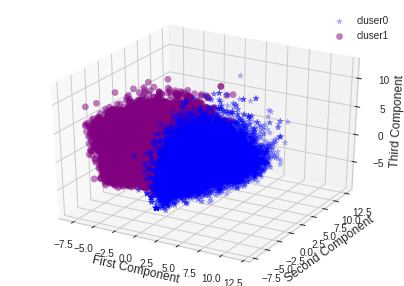

In [ ]:
print_3d(X_pca,y,colors,labels,centers)

In [ ]:
plot_cool_pca_3d(x_scaled, y)

## 4. Performance evaluation (15 points)
### How did our clustering perform against the real labels?

We do have the true lables (fake/real), but we don't know which cluster correspond to which label. Therefore, we check the two options:

*   Define cluster 1 as fake and cluster 2 as real. What is the accuracy?
*   Define cluster 1 as true and cluster 2 as fake. What is the accuracy?

In [ ]:
# fake=0, real=1
text_df['cluster_labels'] = cluster_labels   #cluster 0 as fake and cluster 1 as real
text_df['1'] = (text_df['cluster_labels'] == text_df['label'])
text_df['2'] = (text_df['cluster_labels'] != text_df['label'])

eval = [text_df['2'].sum() / len(text_df),text_df['1'].sum() / len(text_df)]
names = ["cluster 1 as fake and cluster 0 as real","cluster 0 as fake and cluster 1 as real"]

i = eval.index(max(eval))

print(f"when {names[i]} the acuuracy = {eval[i]}");



when cluster 0 as fake and cluster 1 as real the acuuracy = 0.8731569334936968


## 5. Find optimal `k` (10 points)
What is the best k for clustering?

* Cluster using a range of `k` (up to 20) and compare the SSD and the Silhouette values for every k.
* Plot SSD vs. k and Silhouette score vs. k.

Notes:
* You can get the SSD of a clustering using the `inertia_` attribute of the model.
* Silhouette score using `silhouette_score` function from `sklearn.metrics`. This function accept the model and the data.
* Computing Silhouette may takes long time. Estimate the Silhouette using a sample of 300 samples uisng the argument `sample_size=300`.

100%|██████████| 19/19 [36:00<00:00, 113.71s/it]


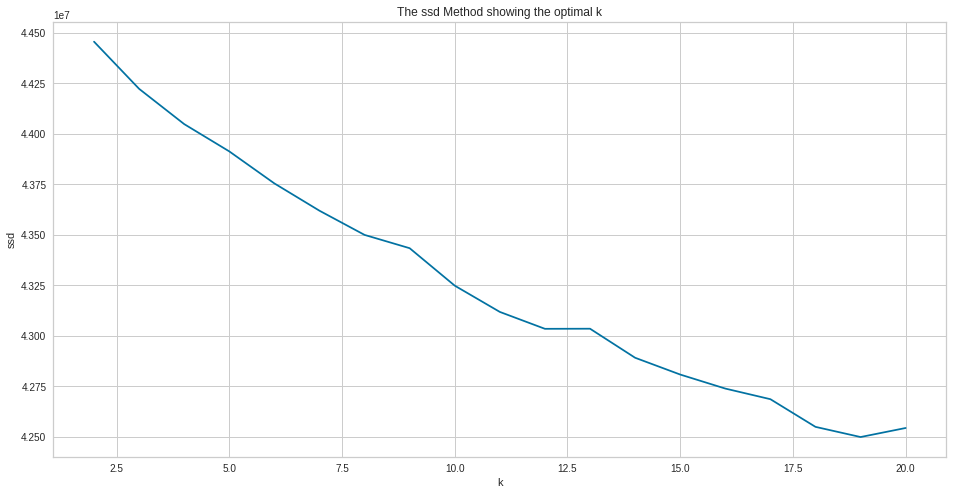

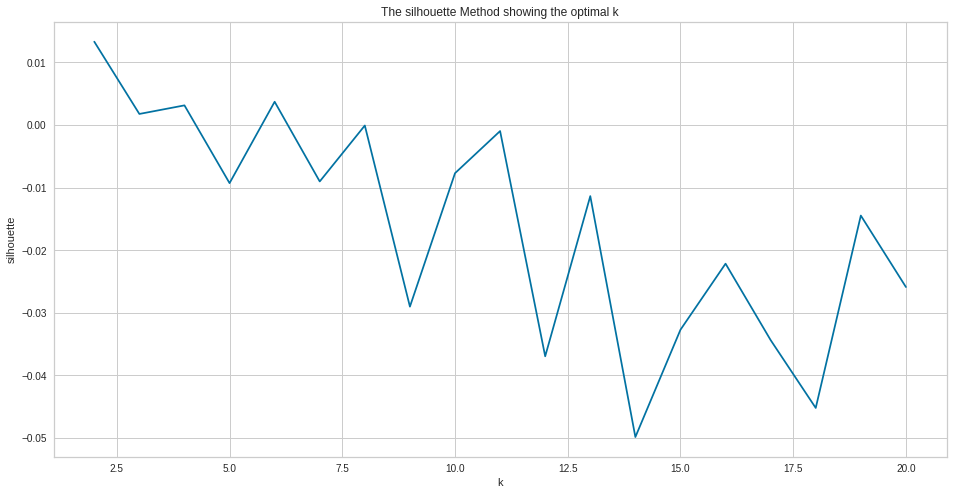

In [ ]:
ssd,silhouette = find_optimal_k(2, 21,X_pca)

### 6. What is the optimal k for clustering? (10 points)

* Explain.
* If optimal k!=2 what can be a good explanation for this?

### The Silhouette Score reach his global maximum at k = 2, as we expexted to see because we have 2 classed(true and fake). hence we will chose k=2.


# 7. PCA then k-means (10 points)

1.   List item
2.   List item


This time, lets try to change the order.
1. Generate TF-IDF 1000 features
2. Run PCA (using all dimenssions)
3. Run k-means
4. Plot 2D and 3D scatter plots
5. Estimate the accuracy according to true labels.
6. Explain how is it compared to the previous approach, where clustering is performed w/o PCA.

Note:
* When you compute the PCA, don't limit to first PCs, but use all of them.

In [ ]:
#pca than kmeans
n_components=1000
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(x_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = [f"PCA{i}" for i in range(1,n_components+1)])

cluster_labels,centers = create_kmeans(n_cluster,principalDf.values)



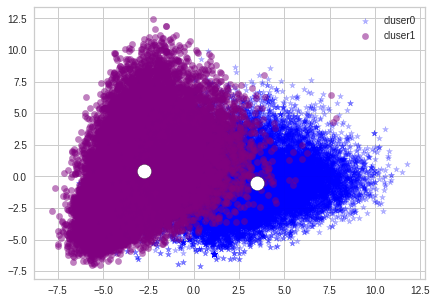

In [ ]:
print_2d(principalDf.values,y,colors,labels,centers)

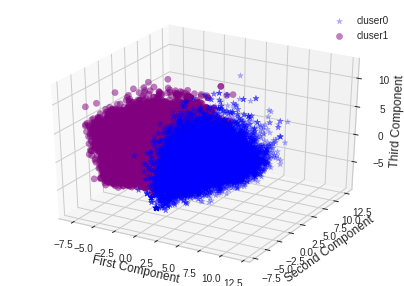

In [ ]:
print_3d(principalDf.values,y,colors,labels)

In [ ]:
# fake=0, real=1
principalDf['label'] = text_df['label'].values
principalDf['fake_ture'] = cluster_labels   #cluster 0 as fake and cluster 1 as real
principalDf['ture_fake'] = cluster_labels   #cluster 1 as fake and cluster 0 as real
principalDf['1'] = (principalDf['fake_ture'] == principalDf['label'])
principalDf['2'] = (principalDf['ture_fake'] != principalDf['label'])

eval = [principalDf['2'].sum() / len(text_df),principalDf['1'].sum() / len(text_df)]
names = ["cluster 1 as fake and cluster 0 as real","cluster 0 as fake and cluster 1 as real"]
i = eval.index(max(eval))
print(f"when {names[i]} the acuuracy = {eval[i]}")



when cluster 0 as fake and cluster 1 as real the acuuracy = 0.8728228428883247


#complete 6 compare 2 object

# MNIST clustering (10 points)
Redo the same analysis, but this time using the MNIST data set. Notice that this time there are actually 10 'true' clusters.

1. What is the accuracy of the clustering when using k=10? \\
   * When for computing the accuracy of 10 classes, first you need to define what is the label of each cluster. Do that by majority votes. In theory, you may get two or more clusters with the same labels. We will ignore that for now. Meaning that you don't need to bother in case there are two clusters with the same label according to the majority vote. Simply count what is the fraction of 'other' digits in each cluster.
2. What is the optimal k?
3. How do the results changes if you first run PCA?

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
x = mnist.data
label_df = mnist.target.to_frame()
label_df.rename(columns = {'class':'true_label'}, inplace = True)
Scaler = preprocessing.StandardScaler() # normalize the data
x_scaled = Scaler.fit_transform(x.values)
y = label_df["true_label"]

NameError: ignored

In [ ]:
label_df['true_label'] = label_df['true_label'].astype(int)

In [ ]:
#perform clusters
n_cluster = 10
cluster_labels,centers = create_kmeans(n_cluster,x_scaled)
label_df['c_label'] = cluster_labels

In [ ]:
##find max value for each cluster label
match_dict = {}

for i in range(0,10):
  match_dict[i] = label_df[label_df['true_label'] == i] ["c_label"].value_counts().index[0]

#apply match
label_df["c_match_labels"] = label_df.apply(lambda x: match_dict[x['c_label']], axis=1)
label_df["check"] = label_df['c_match_labels'] == label_df['true_label']

match_dict


{0: 5, 1: 1, 2: 9, 3: 6, 4: 4, 5: 2, 6: 3, 7: 8, 8: 6, 9: 4}

In [ ]:
# accuracy without PCA
# calculate accuracy metric
s = label_df["check"].sum() / len(label_df)
print(f"accuracy without PCA {s}")


accuracy without PCA 0.3081285714285714


In [ ]:
n_components=x.shape[1]
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(x_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = [f"PCA{i}" for i in range(1,n_components+1)])
centers = 

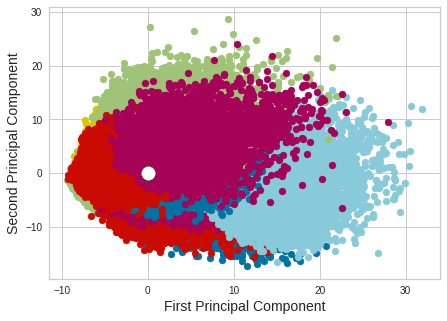

In [ ]:
print_2d(principalDf.values,y,[],[],centers);

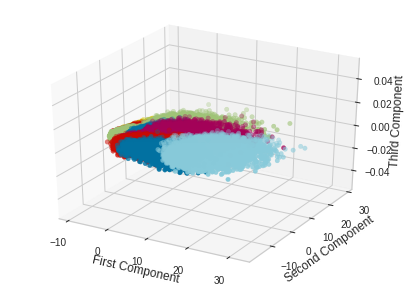

In [ ]:
print_3d(principalDf.values,y,[],[]);

100%|██████████| 19/19 [1:11:37<00:00, 226.21s/it]


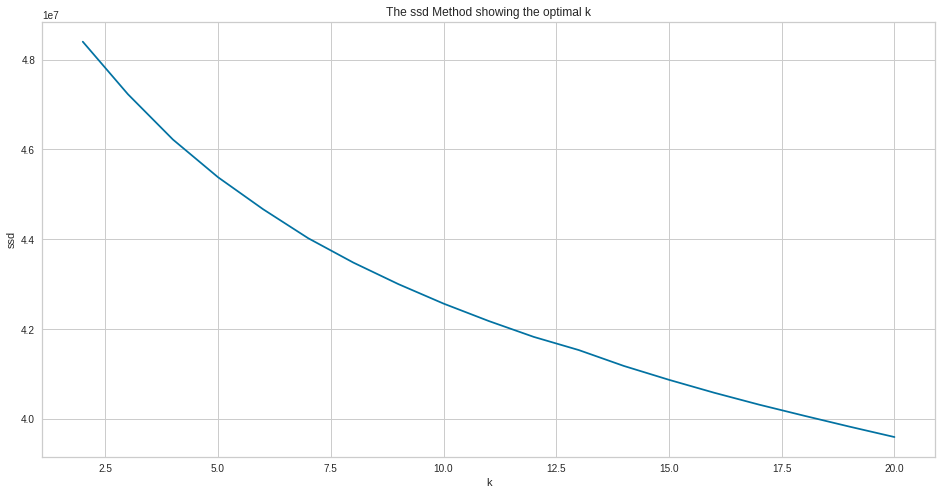

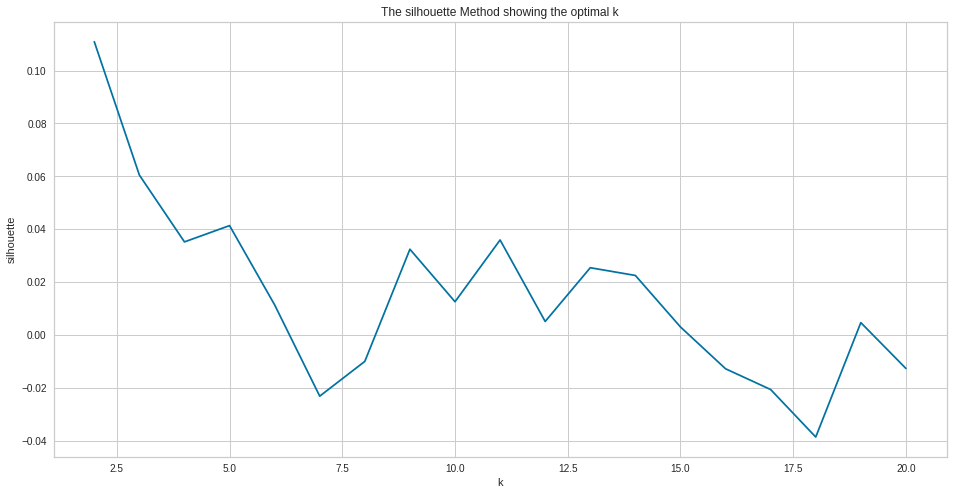

In [ ]:
ssd,silhouette = find_optimal_k(2, 21,x_scaled)

# Compute projection (10 points)
**Notice:** No code required in this section.

Given the next PCA projection matrix
$\begin{pmatrix}
1 & 1\\
2 & -1
\end{pmatrix}$
And the correspoding egienvalues
$(5, -1)$

Compute the projection to one dimension of the next two vectors:
\begin{pmatrix}
1 & 3
\end{pmatrix}
\begin{pmatrix}
3 & 7
\end{pmatrix}

In [ ]:
# Answer here and show your computations (no code)
# in linear algebra, a projection matrix is a matrix associated to a linear operator that maps vectors into their projections onto a subspace




the vector with the higher eigenvalue:
\begin{align}
        v_𝜆 = \begin{pmatrix}
        1\\
        2
        \end{pmatrix}
    \end{align}

feature matrix:
\begin{align}
    feature\ matrix = \begin{pmatrix}
    1 & 3 \\
    3 & 7
    \end{pmatrix}
\end{align}


feature matrix * eiganvector will give us the 1 dim principal component:


\begin{align}
        feature\ matrix\ *\ v_𝜆 = \begin{pmatrix}
        1 & 3 \\
        3 & 7
        \end{pmatrix}.\begin{pmatrix}
        1\\
        2
        \end{pmatrix}\ = \begin{pmatrix}
        7\\
        17
        \end{pmatrix}
    \end{align}



